In [1]:
# math & tables module
import numpy as np
import pandas as pd

# plotting module
from matplotlib import pyplot as plt
import seaborn as sns

# module to show version used in project
import session_info

# statistics module
from scipy import stats as st
import statsmodels.stats.proportion as sp

# pre-processing
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

# class imbalance
from imblearn import under_sampling, over_sampling

# os operation
import os

In [2]:
# session module version
session_info.show()

In [3]:
# reading dataset
data_train = pd.read_csv("train.csv", sep=';')

In [4]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data_train.shape[0]

45211

In [6]:
# reading dataset
data_test = pd.read_csv("test.csv", sep=';')

In [7]:
data_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
data_test.shape[0]

4521

In [9]:
# concat test & train

data = pd.concat([data_train, data_test], axis=0, ignore_index=False)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
data.shape[0]

49732

## Data Cleaning

### Handle Missing Values
from descriptive statistics shown that there are 4 column contain missing-values but not in form of null-values, however in form of value of 'unknown' & 'other' in 4 column named: *job, education, contact, poutcome*. ```poutcome``` are variable that having the most unknown value which consist of more than its 50% data, the best decision taken is to just take out and not use the variables..

#### Job Variable

In [11]:
# Handling missing values in job column using frequent values replacing method

data.job.value_counts().to_frame().T

job,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown
count,10678,10427,8365,5649,4571,2494,1762,1655,1431,1352,1022,326


In [12]:
# replacing the unknown values using the most values containing column (mode) which 'blue-collar'

data.job.replace(to_replace='unknown', value=data.job.mode()[0], inplace=True)
data.job.value_counts().to_frame().T

job,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student
count,11004,10427,8365,5649,4571,2494,1762,1655,1431,1352,1022


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Education Variable

In [13]:
# Handling missing values in education column using frequent values replacing method

data.education.value_counts().to_frame().T

education,secondary,tertiary,primary,unknown
count,25508,14651,7529,2044


In [14]:
data.education.replace(to_replace='unknown', value=data.education.mode()[0], inplace=True)
data.education.value_counts().to_frame().T

education,secondary,tertiary,primary
count,27552,14651,7529


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Contact Variable

In [15]:
# Handling missing values in contact column using frequent values replacing method

data.contact.value_counts().to_frame().T

contact,cellular,unknown,telephone
count,32181,14344,3207


In [16]:
data.contact.replace(to_replace='unknown', value=data.contact.mode()[0], inplace=True)
data.contact.value_counts().to_frame().T

contact,cellular,telephone
count,46525,3207


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Poutcome Variable

In [17]:
# handling the coloumn value named 'other' and change it to its mode value

data.poutcome.value_counts().to_frame().T

poutcome,unknown,failure,other,success
count,40664,5391,2037,1640


In [18]:
# droping the column

data.drop(['poutcome'], axis=1, inplace=True)

# checking the column available after dropping for confirmation
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

Dengan pengecekan diatas didapatkan bahwa variabel ```poutcome``` telah dihapus

### Handle Duplicated Data
from the previous stage, shown that there are no duplication in dataset analyse from all column, so in this section there are no treatment needed to be done

In [19]:
# checking overall

data.duplicated().sum()

4521

In [20]:
data = data.drop_duplicates(keep='first')

In [21]:
# checking overall after handling

data.duplicated().sum()

0

### Handle Outliers
from previous stage, known there are 6 numerical variables having outliers named.
> age, balance, duration, campaign, pdays, previous

from the 6 numerical variables decided for ```pdays & previous``` to be turned into categorical variables since its more fitting for its characteristic more than its own nature as numerical. The two having 0.99 correlation also making it redundant and will just picked one out of the two.

From its description 4 of variables that need outlier handling in this section are.
> **age, duration, campaign**

In [22]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [23]:
# numerical setelah feature selection
numerical = ['age','duration','campaign']

In [24]:
data_num = data[numerical]
data_num.head()

,age,duration,campaign
0,58,261,1
1,44,151,1
2,33,76,1
3,47,92,1
4,33,198,1


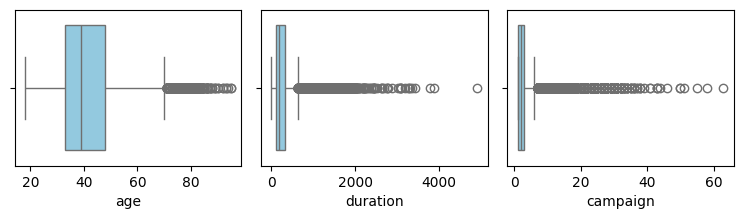

In [25]:
feature = numerical

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.boxplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

#### Defining function to handle the outlier

In [26]:
def iqr_treshold(variable):
    Q1 = data[variable].quantile(.25)
    Q3 = data[variable].quantile(.75)

    IQR = Q3-Q1

    min_tresh = Q1 - (1.5*IQR)
    max_tresh = Q1 + (1.5*IQR)
    
    return min_tresh, max_tresh

In [27]:
def iqr_normalize(variable):
    normal = ((data[variable] >= iqr_treshold(variable)[0]) & 
                (data[variable] <= iqr_treshold(variable)[1]))
    data['outlier_label'] = normal

#### Normalizing outlier in age variable

In [28]:
outlier = iqr_treshold("age")
print('''Umur yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari '''+str(outlier[0])+
      '''\n         Nilai yang lebih dari '''+str(outlier[1]))

Umur yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari 10.5
         Nilai yang lebih dari 55.5


In [29]:
iqr_normalize("age")
outlier_age = data.query("outlier_label == False").y.count()
print('''Jumlah outlier yang ada pada variable age adalah sejumlah '''+str(outlier_age))

Jumlah outlier yang ada pada variable age adalah sejumlah 4900


In [30]:
# Removing the outlier using drop feature

data = data.drop(data.query("outlier_label == False").index)

#### Normalizing outlier in campaign variable

In [31]:
outlier = iqr_treshold("campaign")
print('''Jumlah Campaign yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari '''+str(outlier[0])+
      '''\n         Nilai yang lebih dari '''+str(outlier[1]))

Jumlah Campaign yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari -2.0
         Nilai yang lebih dari 4.0


In [32]:
iqr_normalize("campaign")
outlier_campaign = data.query("outlier_label == False").y.count()
print('''Jumlah outlier yang ada pada variable cammpaign adalah sejumlah '''+str(outlier_campaign))

Jumlah outlier yang ada pada variable cammpaign adalah sejumlah 5493


In [33]:
# Removing the outlier using drop feature

data = data.drop(data.query("outlier_label == False").index)

#### Normalizing outlier in duration variable

In [34]:
outlier = iqr_treshold("duration")
print('''Jumlah duration dalam detik yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari '''+str(outlier[0])+
      '''\n         Nilai yang lebih dari '''+str(outlier[1]))

Jumlah duration dalam detik yang dianggap outlier berdasarkan IQR adalah yang memiliki
         Nilai yang kurang dari -214.0
         Nilai yang lebih dari 434.0


In [35]:
iqr_normalize("duration")
outlier_duration = data.query("outlier_label == False").y.count()
print('''Jumlah outlier yang ada pada variable cammpaign adalah sejumlah '''+str(outlier_duration))

Jumlah outlier yang ada pada variable cammpaign adalah sejumlah 5414


In [36]:
# Removing the outlier using drop feature

data = data.drop(data.query("outlier_label == False").index)

In [37]:
# Counting outlier coloumn dropped

jumlah_outlier = outlier_age + outlier_campaign + outlier_duration
print('''Jumlah column dropped dari outlier adalah sejumlah '''+str(jumlah_outlier))

Jumlah column dropped dari outlier adalah sejumlah 15807


#### boxplot after normalize

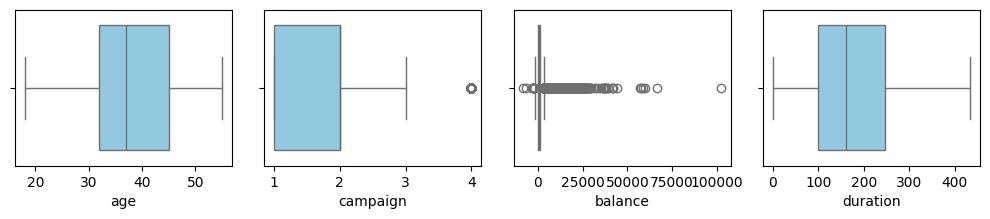

In [38]:
feature = ['age','campaign','balance','duration']

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.boxplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

In [39]:
data.drop(['outlier_label'], axis=1, inplace=True)

In [40]:
# its central tendency info after outlier handing using IQR
data[numerical].describe()

,age,duration,campaign
count,29404.000000,29404.000000,29404.000000
mean,38.509999,179.386206,1.871582
std,8.283058,101.664837,0.969856
min,18.000000,0.000000,1.000000
25%,32.000000,99.000000,1.000000
50%,37.000000,160.000000,2.000000
75%,45.000000,247.000000,2.000000
max,55.000000,434.000000,4.000000


### Feature Extraction

In [41]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,no


#### Transforming ```previous``` variable into categorical so its usable

In [42]:
data.query("previous > 0").y.count()

5727

In [43]:
data.previous = np.where(data.previous == 0, 0, 1)

In [44]:
data.previous.value_counts()

previous
0    23677
1     5727
Name: count, dtype: int64

## Feature Engineering

### Feature Selection
Feature used in modelling are.
> age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, previous

Classification label
> y

In [45]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,no


In [46]:
data.drop(['pdays'], axis=1, inplace=True)

In [47]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,no


### Feature Encoding

In [48]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,no


In [49]:
# after feature selection
category = ['job','marital','education','default','housing','loan','contact','month','y']
cat_ordinal = ['education','default','housing','loan','month','y']
cat_nominal = ['job','contact', 'marital']

#### label encoder categorical to numerical

In [50]:
mapping_month = {
    'jan' : 0,
    'feb' : 1,
    'mar' : 2,
    'apr' : 3,
    'may' : 4,
    'jun' : 5,
    'jul' : 6,
    'aug' : 7,
    'sep' : 8,
    'oct' : 9,
    'nov' : 10,
    'dec' : 11
}

data['month'] = data['month'].map(mapping_month)

In [51]:
mapping_education = {
    'primary'   : 0,
    'secondary' : 1, 
    'tertiary'  :2
}

data['education'] = data['education'].map(mapping_education)

In [52]:
mapping_default = {
    'yes' : 1,
    'no'  : 0
}

data['default'] = data['default'].map(mapping_default)

In [53]:
mapping_housing = {
    'yes' : 1,
    'no'  : 0
}

data['housing'] = data['housing'].map(mapping_housing)

In [54]:
mapping_loan = {
    'yes' : 1,
    'no'  : 0
}

data['loan'] = data['loan'].map(mapping_loan)

In [55]:
mapping_y = {
    'yes' : 1,
    'no'  : 0
}

data['y'] = data['y'].map(mapping_y)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29404 entries, 1 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        29404 non-null  int64 
 1   job        29404 non-null  object
 2   marital    29404 non-null  object
 3   education  29404 non-null  int64 
 4   default    29404 non-null  int64 
 5   balance    29404 non-null  int64 
 6   housing    29404 non-null  int64 
 7   loan       29404 non-null  int64 
 8   contact    29404 non-null  object
 9   day        29404 non-null  int64 
 10  month      29404 non-null  int64 
 11  duration   29404 non-null  int64 
 12  campaign   29404 non-null  int64 
 13  previous   29404 non-null  int64 
 14  y          29404 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 3.6+ MB


#### OHE categorical to numerical

In [57]:
data.reset_index(drop=True, inplace=True)

In [58]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
29399,53,management,married,2,0,583,0,0,cellular,17,10,226,1,1,1
29400,34,admin.,single,1,0,557,0,0,cellular,17,10,224,1,0,1
29401,23,student,single,2,0,113,0,0,cellular,17,10,266,1,0,1
29402,25,technician,single,1,0,505,0,1,cellular,17,10,386,2,0,1
29403,37,entrepreneur,married,1,0,2971,0,0,cellular,17,10,361,2,1,0


##### Contact

In [59]:
data.contact.value_counts()

contact
cellular     28017
telephone     1387
Name: count, dtype: int64

In [60]:
contact_ohe = pd.get_dummies(data['contact'],prefix='contact', dtype=int)
data = data.join(contact_ohe)

##### Marital

In [61]:
data.marital.value_counts()

marital
married     17027
single       9198
divorced     3179
Name: count, dtype: int64

In [62]:
marital_ohe = pd.get_dummies(data['marital'],prefix='marital', dtype=int)
data = data.join(marital_ohe)

##### Job

In [63]:
data.job.value_counts()

job
blue-collar      6721
management       6249
technician       5222
admin.           3669
services         2930
self-employed    1037
entrepreneur      975
unemployed        850
student           718
housemaid         709
retired           324
Name: count, dtype: int64

In [64]:
job_ohe = pd.get_dummies(data['job'],prefix='job', dtype=int)
data = data.join(job_ohe)

In [65]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'y', 'contact_cellular', 'contact_telephone', 'marital_divorced',
       'marital_married', 'marital_single', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed'],
      dtype='object')

In [66]:
data.drop(['job','marital','contact'], axis=1, inplace=True)

In [67]:
data.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'previous', 'y', 'contact_cellular',
       'contact_telephone', 'marital_divorced', 'marital_married',
       'marital_single', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed'],
      dtype='object')

In [68]:
data.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
count,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,...,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000
mean,38.509999,1.165556,0.018297,1260.579309,0.592606,0.165012,15.436199,5.080227,179.386206,1.871582,...,0.228574,0.033159,0.024112,0.212522,0.011019,0.035267,0.099646,0.024418,0.177595,0.028908
std,8.283058,0.638739,0.134025,2767.124950,0.491358,0.371197,8.262765,2.456808,101.664837,0.969856,...,0.419922,0.179054,0.153401,0.409099,0.104393,0.184458,0.299533,0.154347,0.382178,0.167550
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,66.000000,0.000000,0.000000,8.000000,4.000000,99.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,0.000000,419.000000,1.000000,0.000000,15.000000,4.000000,160.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,2.000000,0.000000,1328.000000,1.000000,0.000000,21.000000,6.000000,247.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,55.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,434.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Transformation 

In [69]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,44,1,0,29,1,0,5,4,151,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,33,1,0,2,1,1,5,4,76,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,47,1,0,1506,1,0,5,4,92,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,33,1,0,1,0,0,5,4,198,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,35,2,0,231,1,0,5,4,139,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29404 entries, 0 to 29403
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                29404 non-null  int64
 1   education          29404 non-null  int64
 2   default            29404 non-null  int64
 3   balance            29404 non-null  int64
 4   housing            29404 non-null  int64
 5   loan               29404 non-null  int64
 6   day                29404 non-null  int64
 7   month              29404 non-null  int64
 8   duration           29404 non-null  int64
 9   campaign           29404 non-null  int64
 10  previous           29404 non-null  int64
 11  y                  29404 non-null  int64
 12  contact_cellular   29404 non-null  int64
 13  contact_telephone  29404 non-null  int64
 14  marital_divorced   29404 non-null  int64
 15  marital_married    29404 non-null  int64
 16  marital_single     29404 non-null  int64
 17  job_admin.  

In [71]:
data[numerical].columns

Index(['age', 'duration', 'campaign'], dtype='object')

In [72]:
# numerical scalling
data.loc[:,['age']] = StandardScaler().fit_transform(data['age'].values.reshape(len(data),1))
data.loc[:,['campaign']] = StandardScaler().fit_transform(data['campaign'].values.reshape(len(data),1))
data.loc[:,['balance']] = StandardScaler().fit_transform(data['balance'].values.reshape(len(data),1))
data.loc[:,['duration']] = StandardScaler().fit_transform(data['duration'].values.reshape(len(data),1))
data.loc[:,['day']] = StandardScaler().fit_transform(data['age'].values.reshape(len(data),1))

In [73]:
cat_ordinal

['education', 'default', 'housing', 'loan', 'month', 'y']

In [74]:
# categorical ordinal more than 2 value scalling
data.loc[:,['education']] = StandardScaler().fit_transform(data['education'].values.reshape(len(data),1))
data.loc[:,['month']] = StandardScaler().fit_transform(data['month'].values.reshape(len(data),1))

In [75]:
data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0.662810,-0.259196,0,-0.445083,1,0,0.662810,-0.439695,-0.279218,-0.898687,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-0.665224,-0.259196,0,-0.454841,1,1,-0.665224,-0.439695,-1.016949,-0.898687,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1.025001,-0.259196,0,0.088693,1,0,1.025001,-0.439695,-0.859567,-0.898687,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.665224,-0.259196,0,-0.455202,0,0,-0.665224,-0.439695,0.183093,-0.898687,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,-0.423764,1.306414,0,-0.372082,1,0,-0.423764,-0.439695,-0.397255,-0.898687,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [76]:
data.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
count,2.940400e+04,2.940400e+04,29404.000000,29404.000000,29404.000000,29404.000000,2.940400e+04,2.940400e+04,2.940400e+04,2.940400e+04,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000,29404.000000
mean,3.557063e-16,9.279296e-17,0.018297,0.000000,0.592606,0.165012,-3.093099e-17,-8.119384e-17,-7.732746e-18,1.391894e-16,0.194769,0.069106,0.952830,0.047170,0.108115,0.579071,0.312815,0.124779,0.228574,0.033159,0.024112,0.212522,0.011019,0.035267,0.099646,0.024418,0.177595,0.028908
std,1.000017e+00,1.000017e+00,0.134025,1.000017,0.491358,0.371197,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.396030,0.253639,0.212007,0.212007,0.310530,0.493717,0.463647,0.330474,0.419922,0.179054,0.153401,0.409099,0.104393,0.184458,0.299533,0.154347,0.382178,0.167550
min,-2.476180e+00,-1.824806e+00,0.000000,-3.353566,0.000000,0.000000,-2.476180e+00,-2.067851e+00,-1.764516e+00,-8.986865e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.859548e-01,-2.591957e-01,0.000000,-0.431711,0.000000,0.000000,-7.859548e-01,-4.396947e-01,-7.907117e-01,-8.986865e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.823028e-01,-2.591957e-01,0.000000,-0.304140,1.000000,0.000000,-1.823028e-01,-4.396947e-01,-1.906907e-01,1.324114e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.835405e-01,1.306414e+00,0.000000,0.024365,1.000000,0.000000,7.835405e-01,3.743835e-01,6.650770e-01,1.324114e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.990845e+00,1.306414e+00,1.000000,36.452324,1.000000,1.000000,1.990845e+00,2.409579e+00,2.504486e+00,2.194607e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


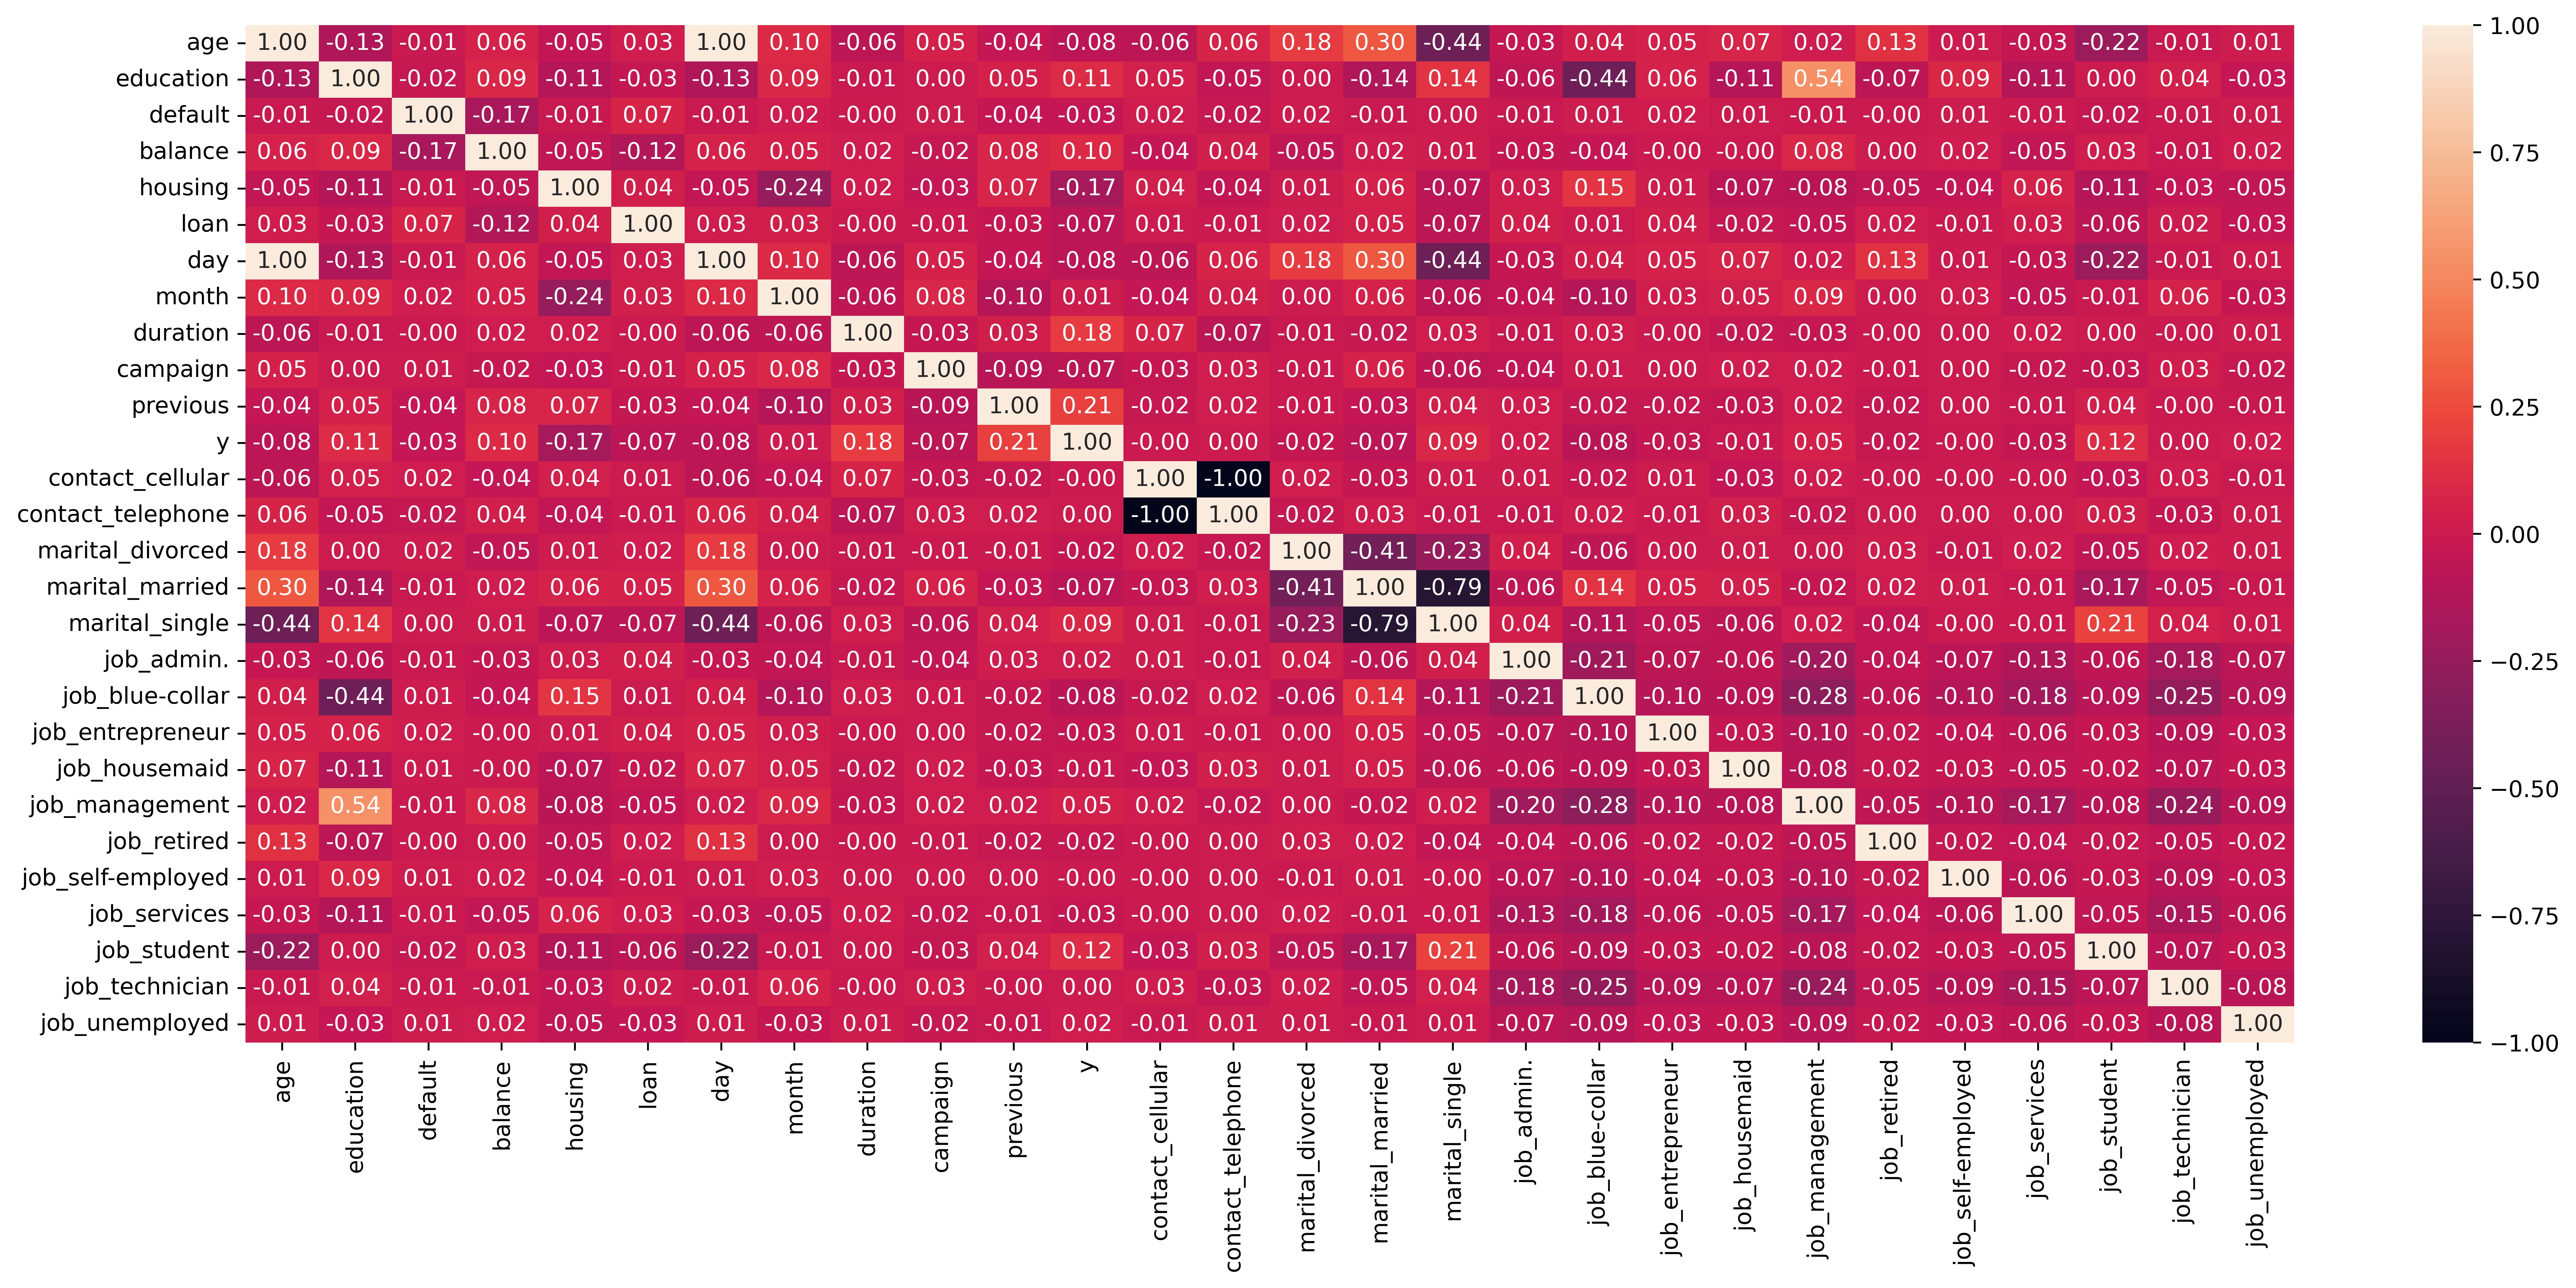

In [77]:
plt.figure(figsize=(20,8), dpi =500)
sns.heatmap(data.corr(method='spearman'), annot=True, fmt='.2f')
plt.show()

In [92]:
ket = ['y','previous','duration','job_student','education','marital_single']

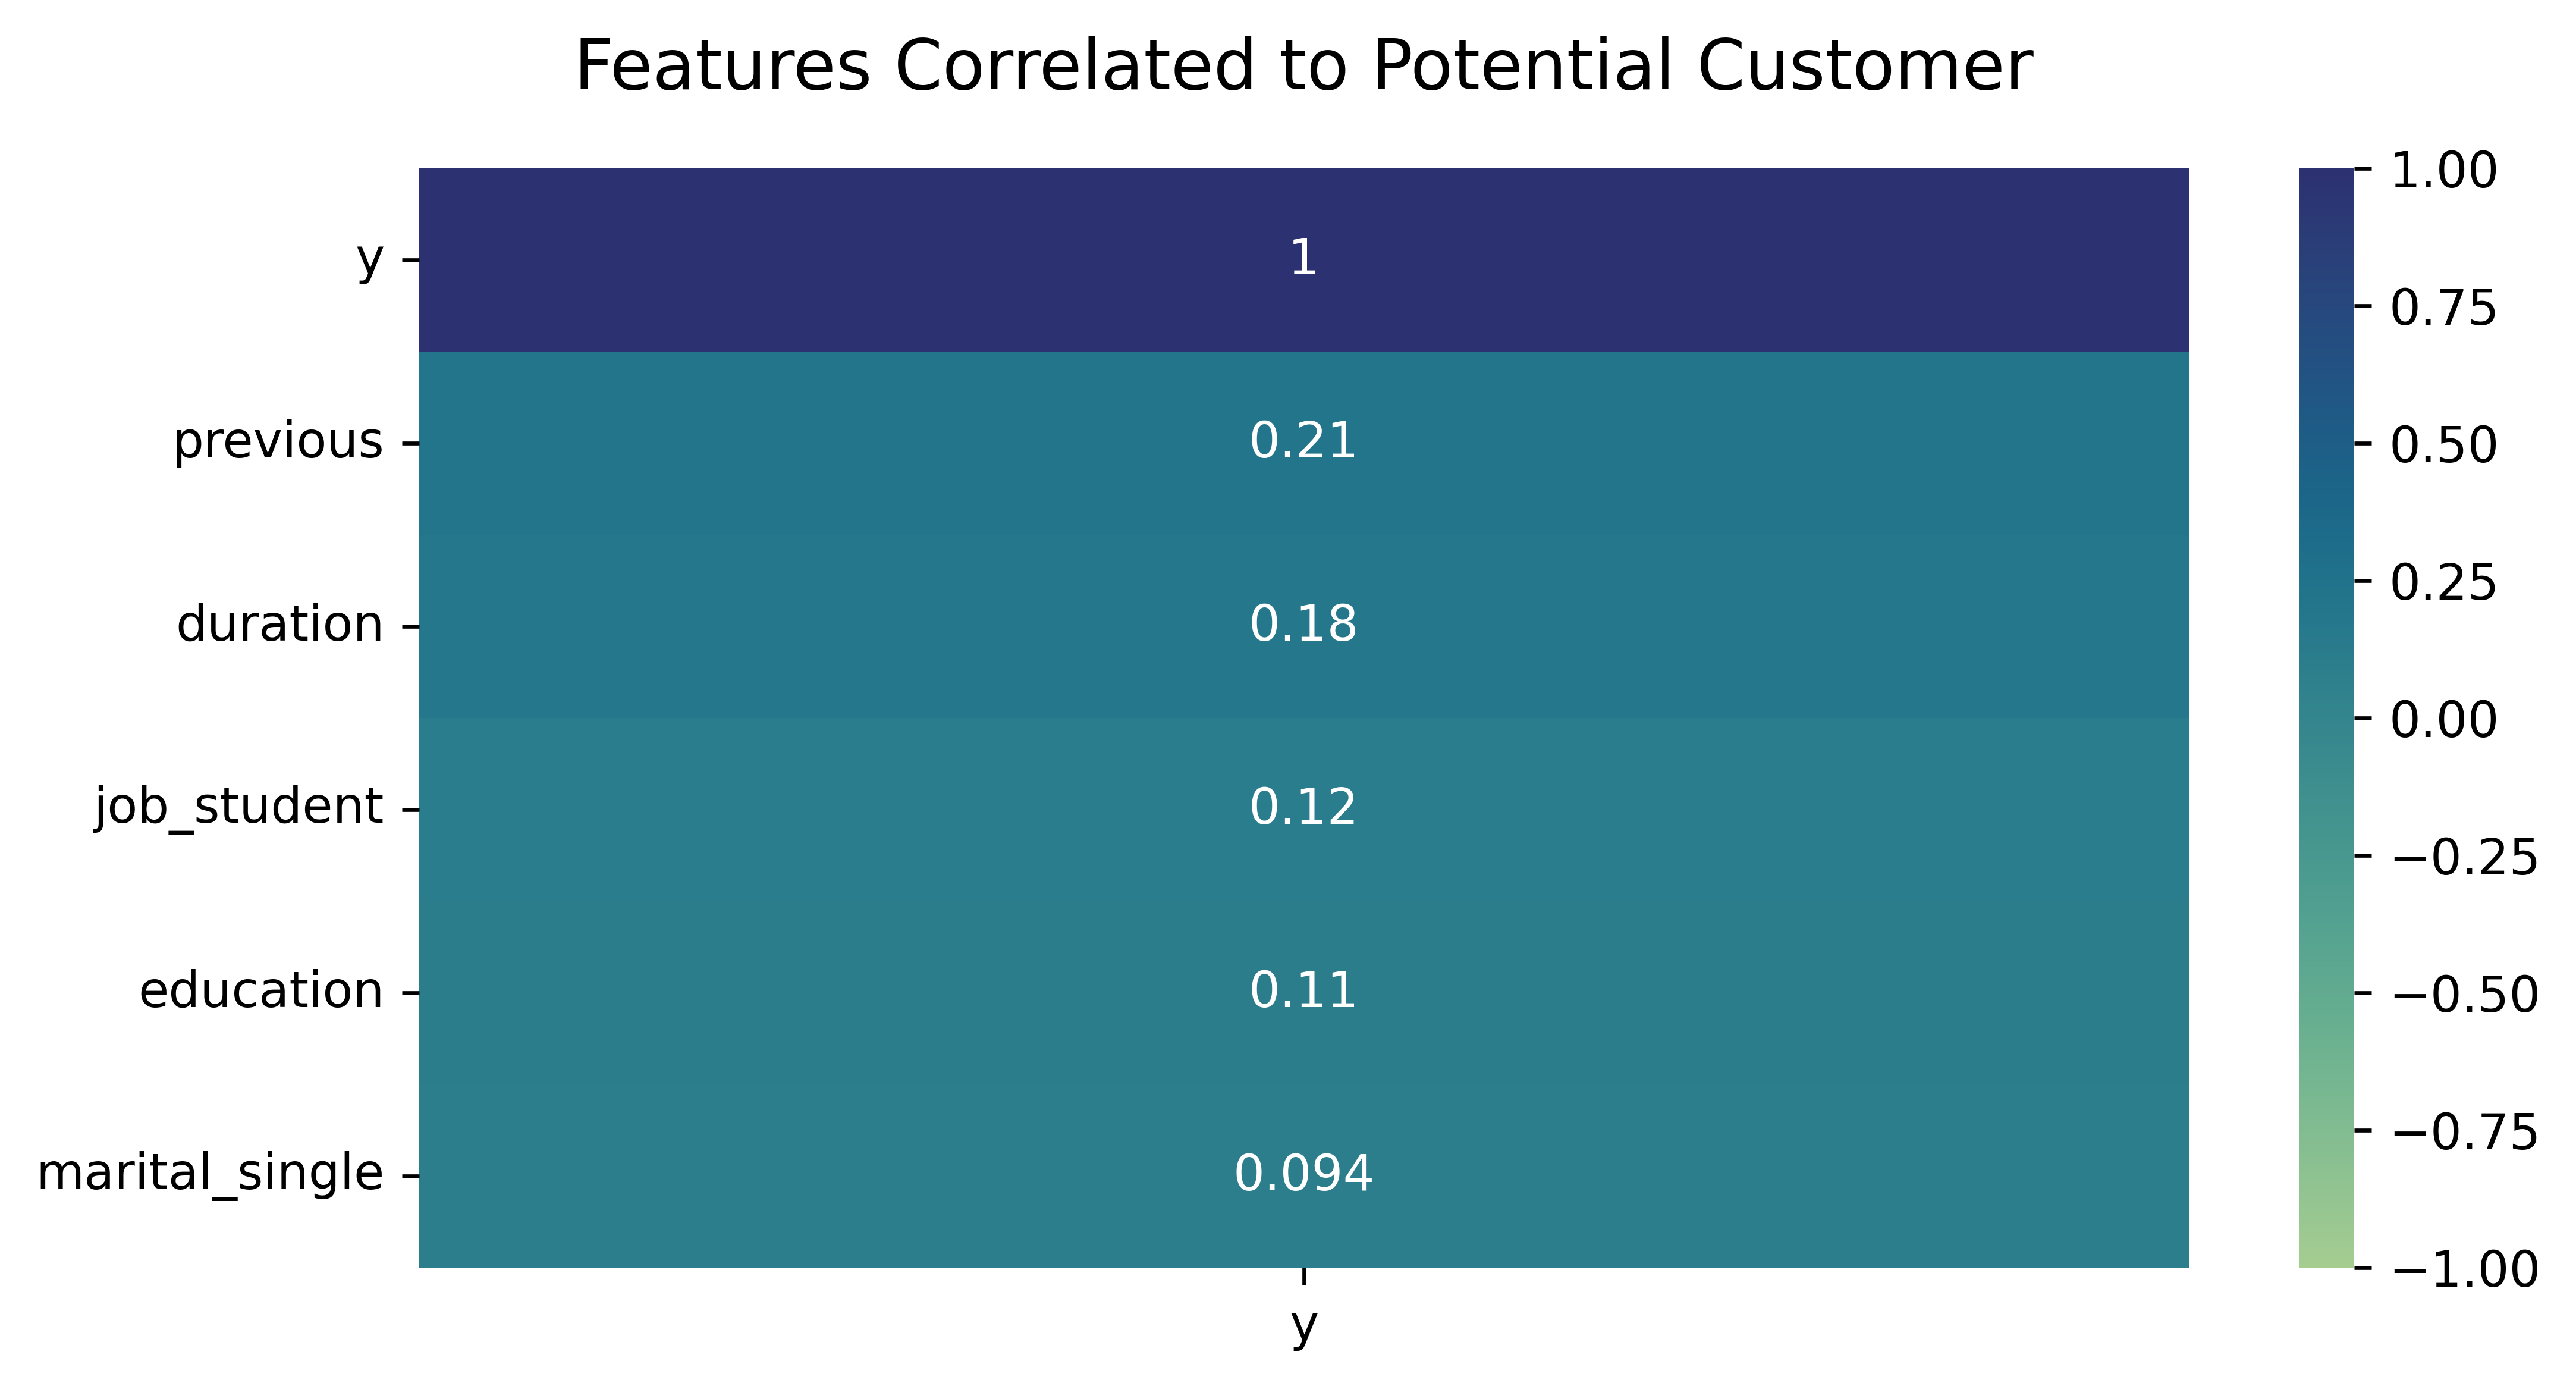

In [95]:
plt.figure(figsize=(8, 4), dpi=600)
heatmap = sns.heatmap(data[ket].corr()[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True, cmap='crest')
heatmap.set_title('Features Correlated to Potential Customer', fontdict={'fontsize':14}, pad=16);

### Class Imbalance

In [ ]:
# categorising feature & label
feature = ['age','education','default','balance','housing','loan','day','month','duration','campaign','previous',
          'contact_cellular','contact_telephone','marital_divorced','marital_married','marital_single',
          'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
          'job_services','job_student','job_technician','job_unemployed']
label = ['y']

In [ ]:
# splitting the feature & labels to 2 variabels
X = data[feature]
y = data['y'].values

In [ ]:
# checking data count

print(X.shape)
print(y.shape)

In [ ]:
# checking are there any imbalance? yes there are, so SMOTE action gonna be applied

pd.Series(y).value_counts()

In [ ]:
# using oversampling

X_over, y_over = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
# checking data count after imbalance handling

print(X_over.shape)
print(y_over.shape)

In [ ]:
# checking the imbalance handling result

pd.Series(y_over).value_counts()

### Exporting clean train Dataframe

In [ ]:
var = X_over

label = pd.DataFrame(y_over.tolist())
label.rename(columns = {0:'y'}, inplace = True)

In [ ]:
train_output = pd.concat([var, label], axis=1)

In [ ]:
cwd = os.getcwd()
path = cwd + "/output/data.csv"
train_output.to_csv(path, encoding='utf-8', index=False)